### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

### Reading the dataset

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.drop('id', axis = 1, inplace = True)

In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



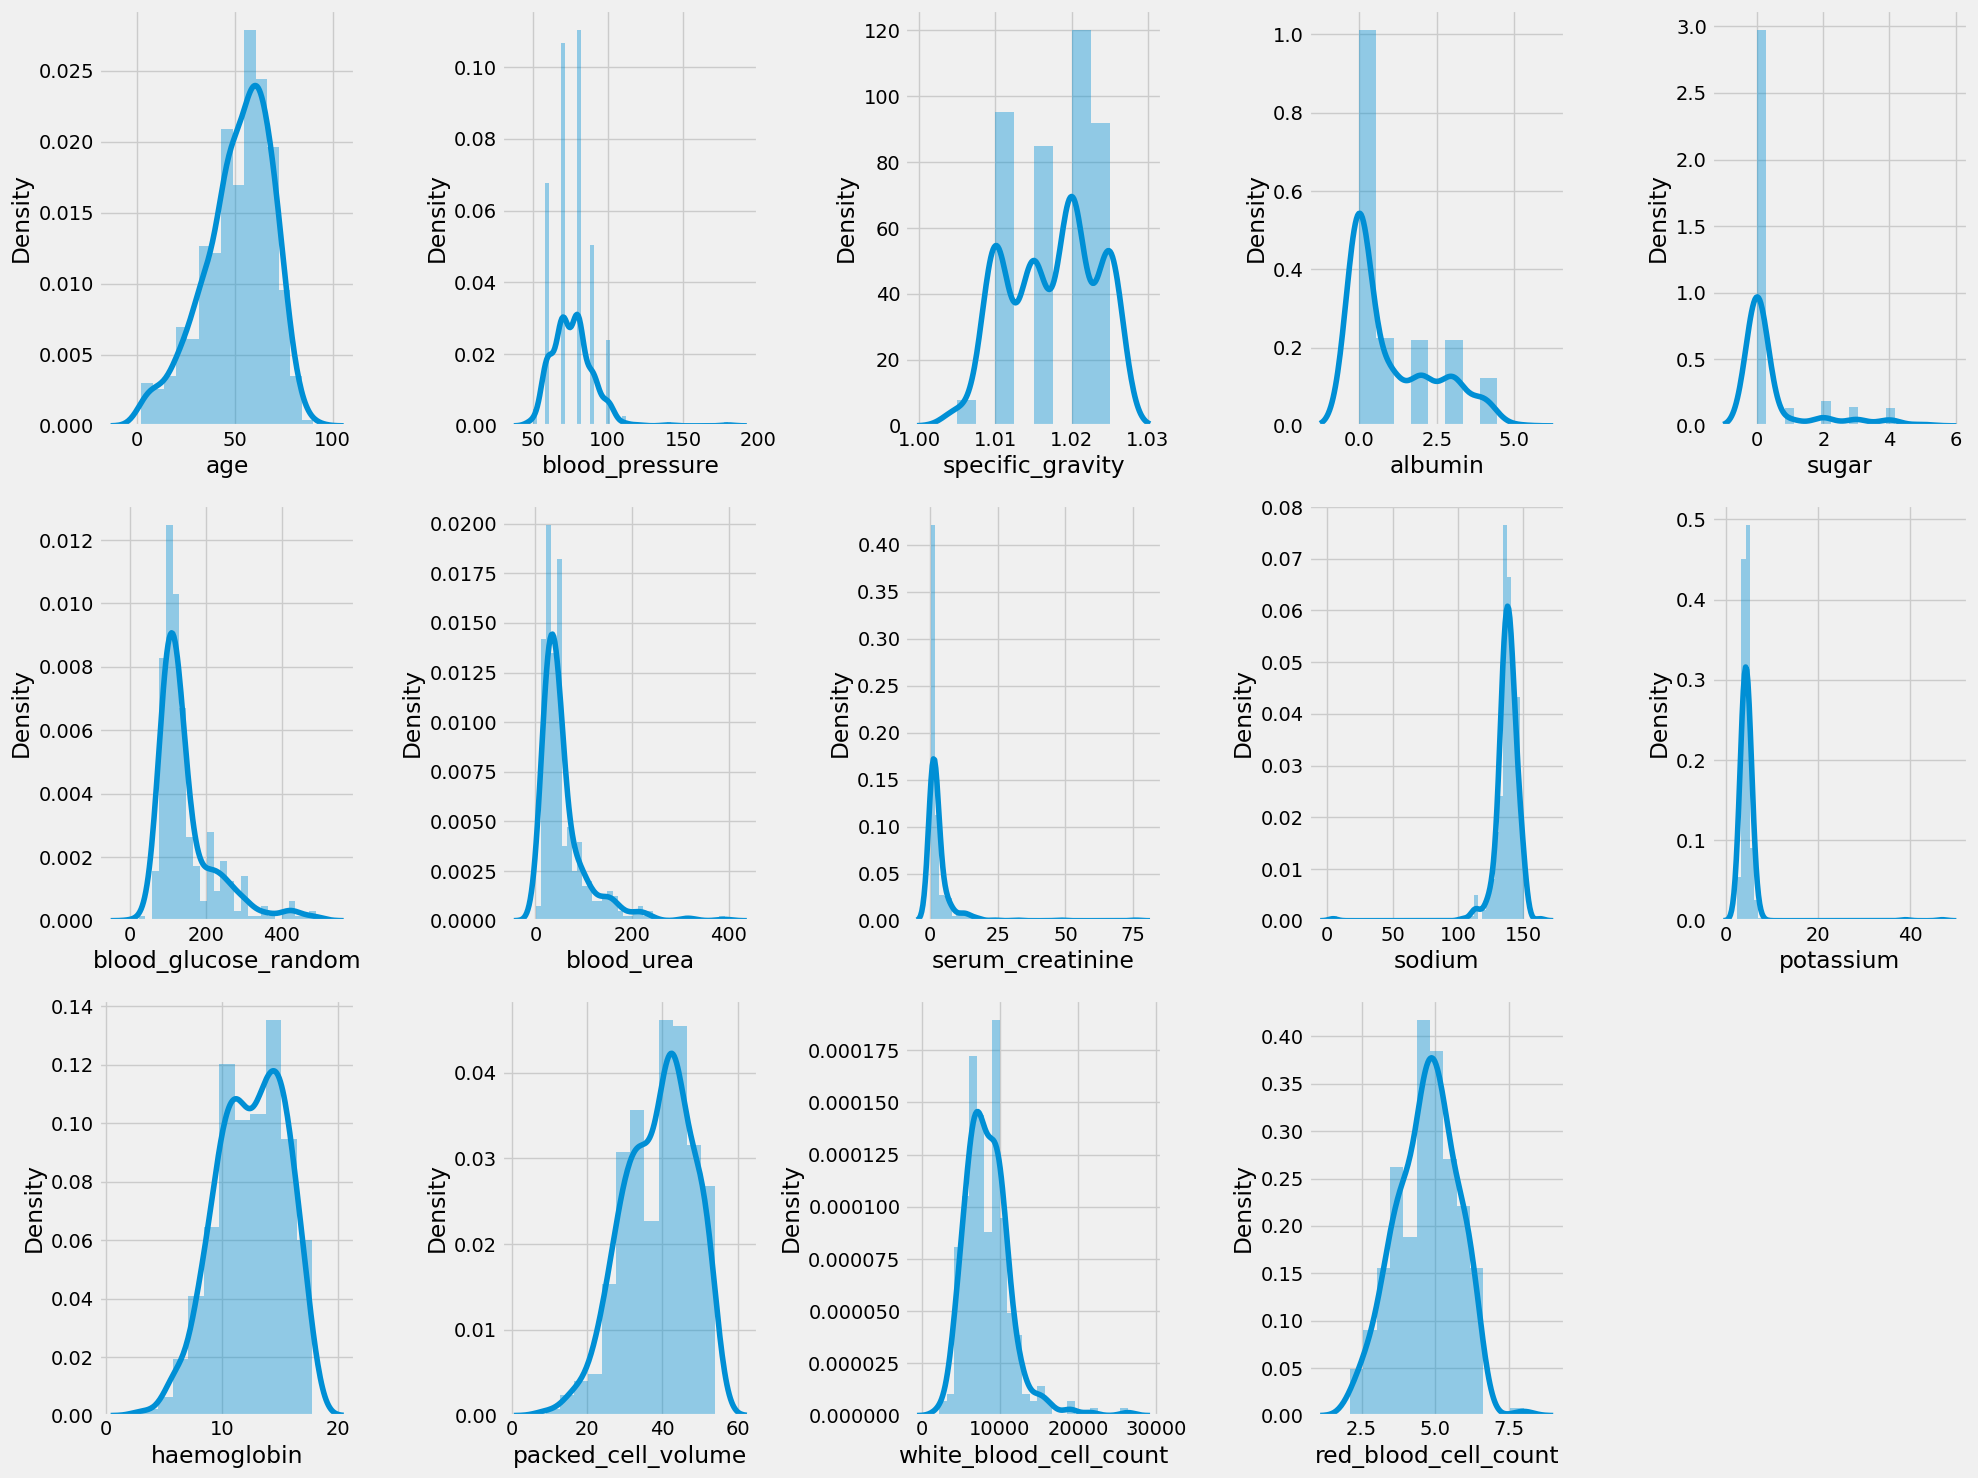

In [16]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

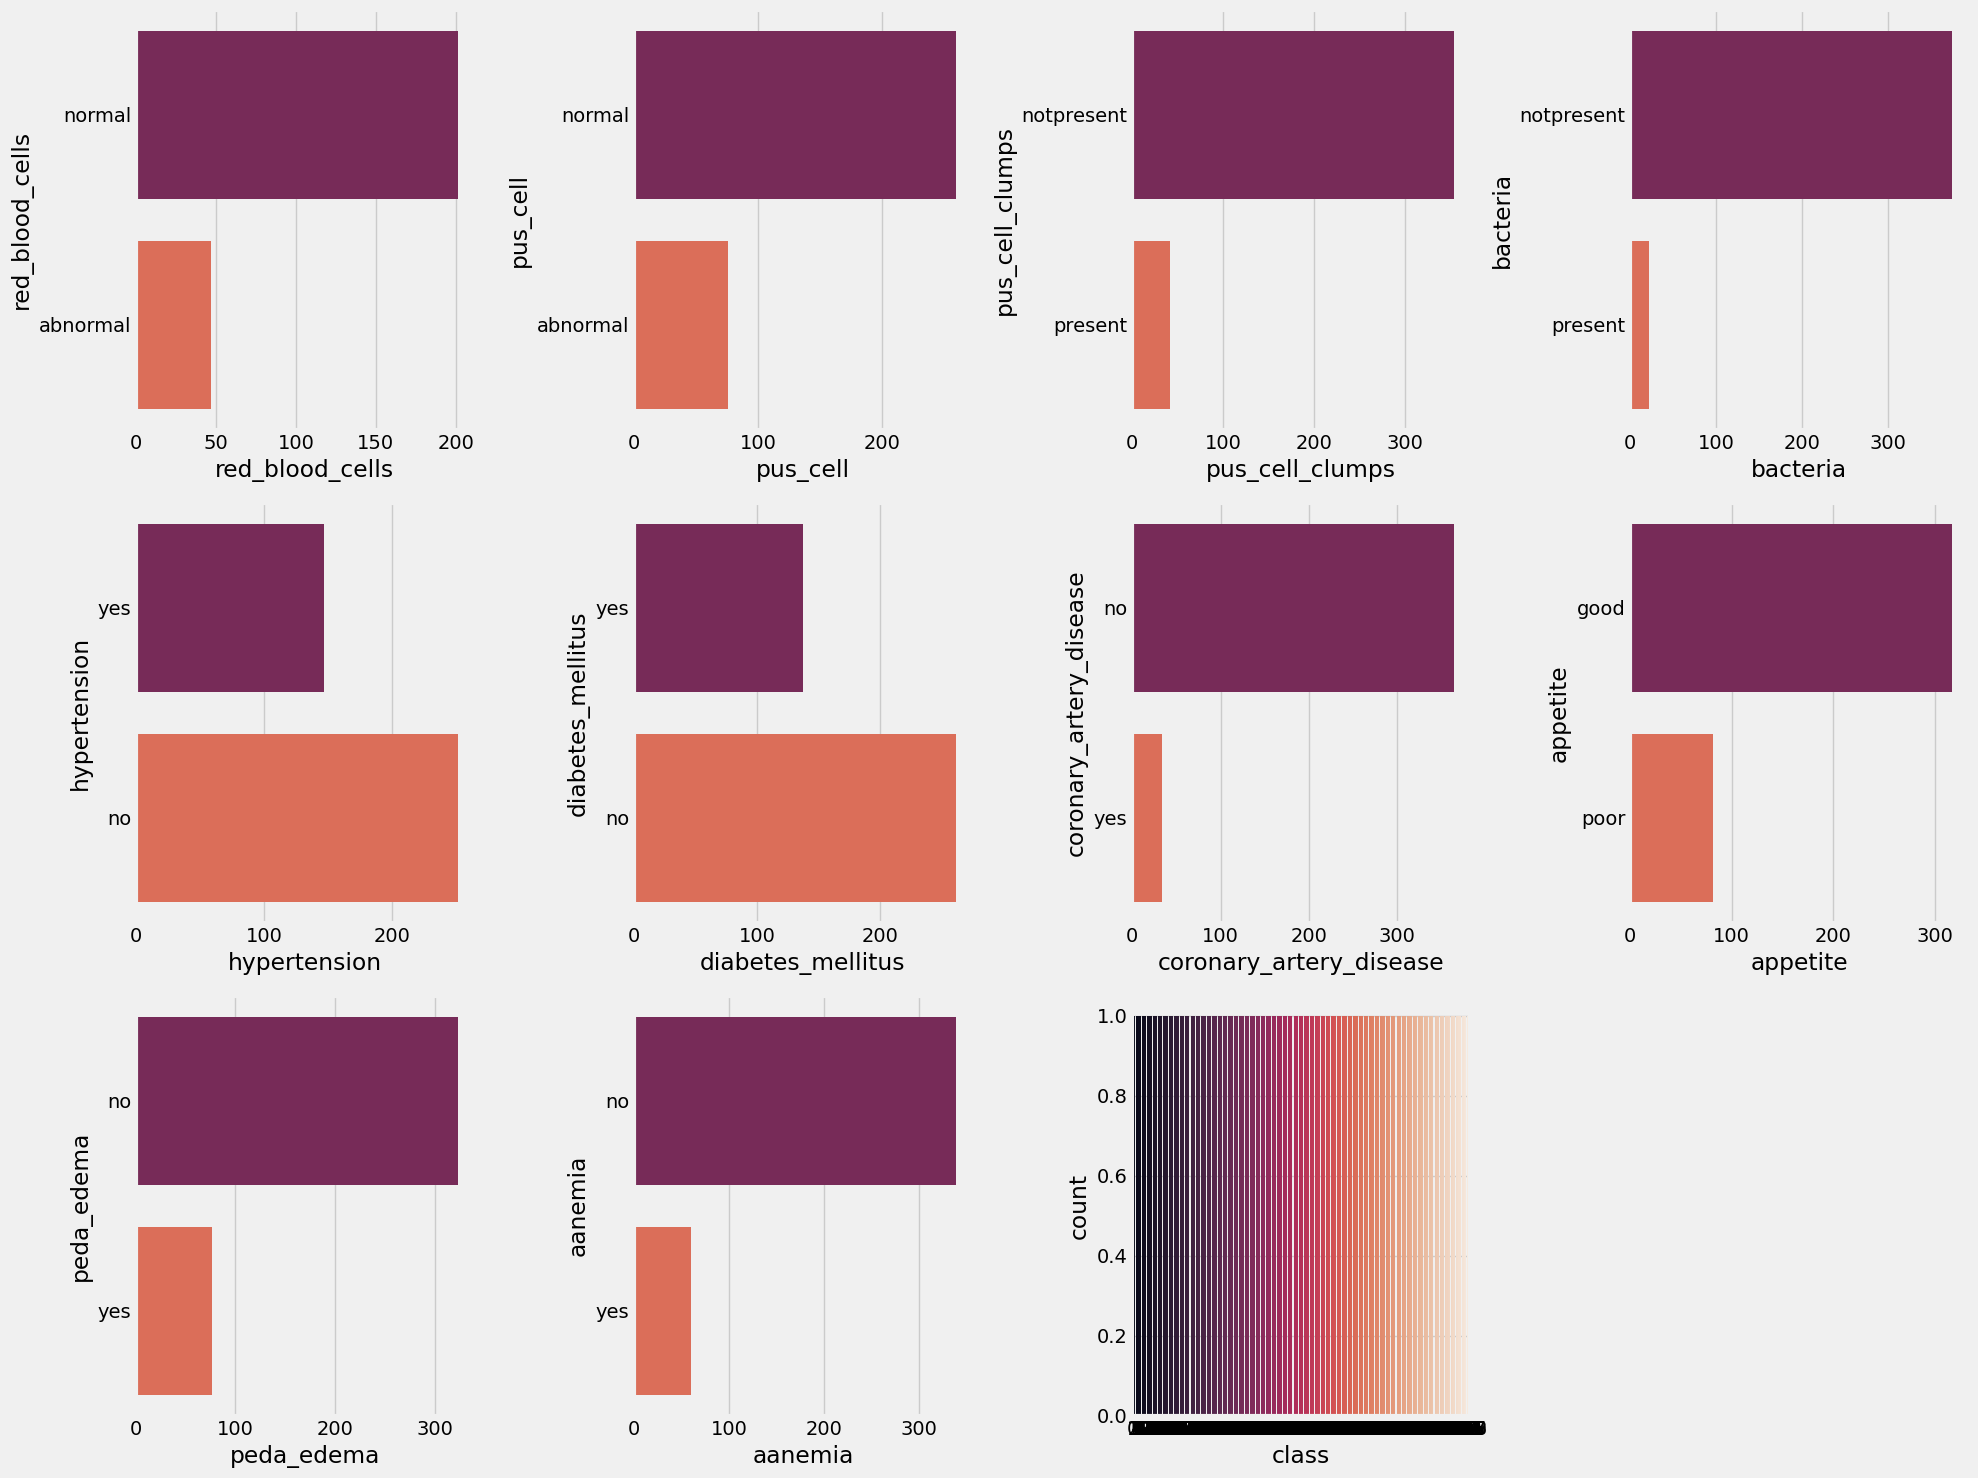

In [17]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

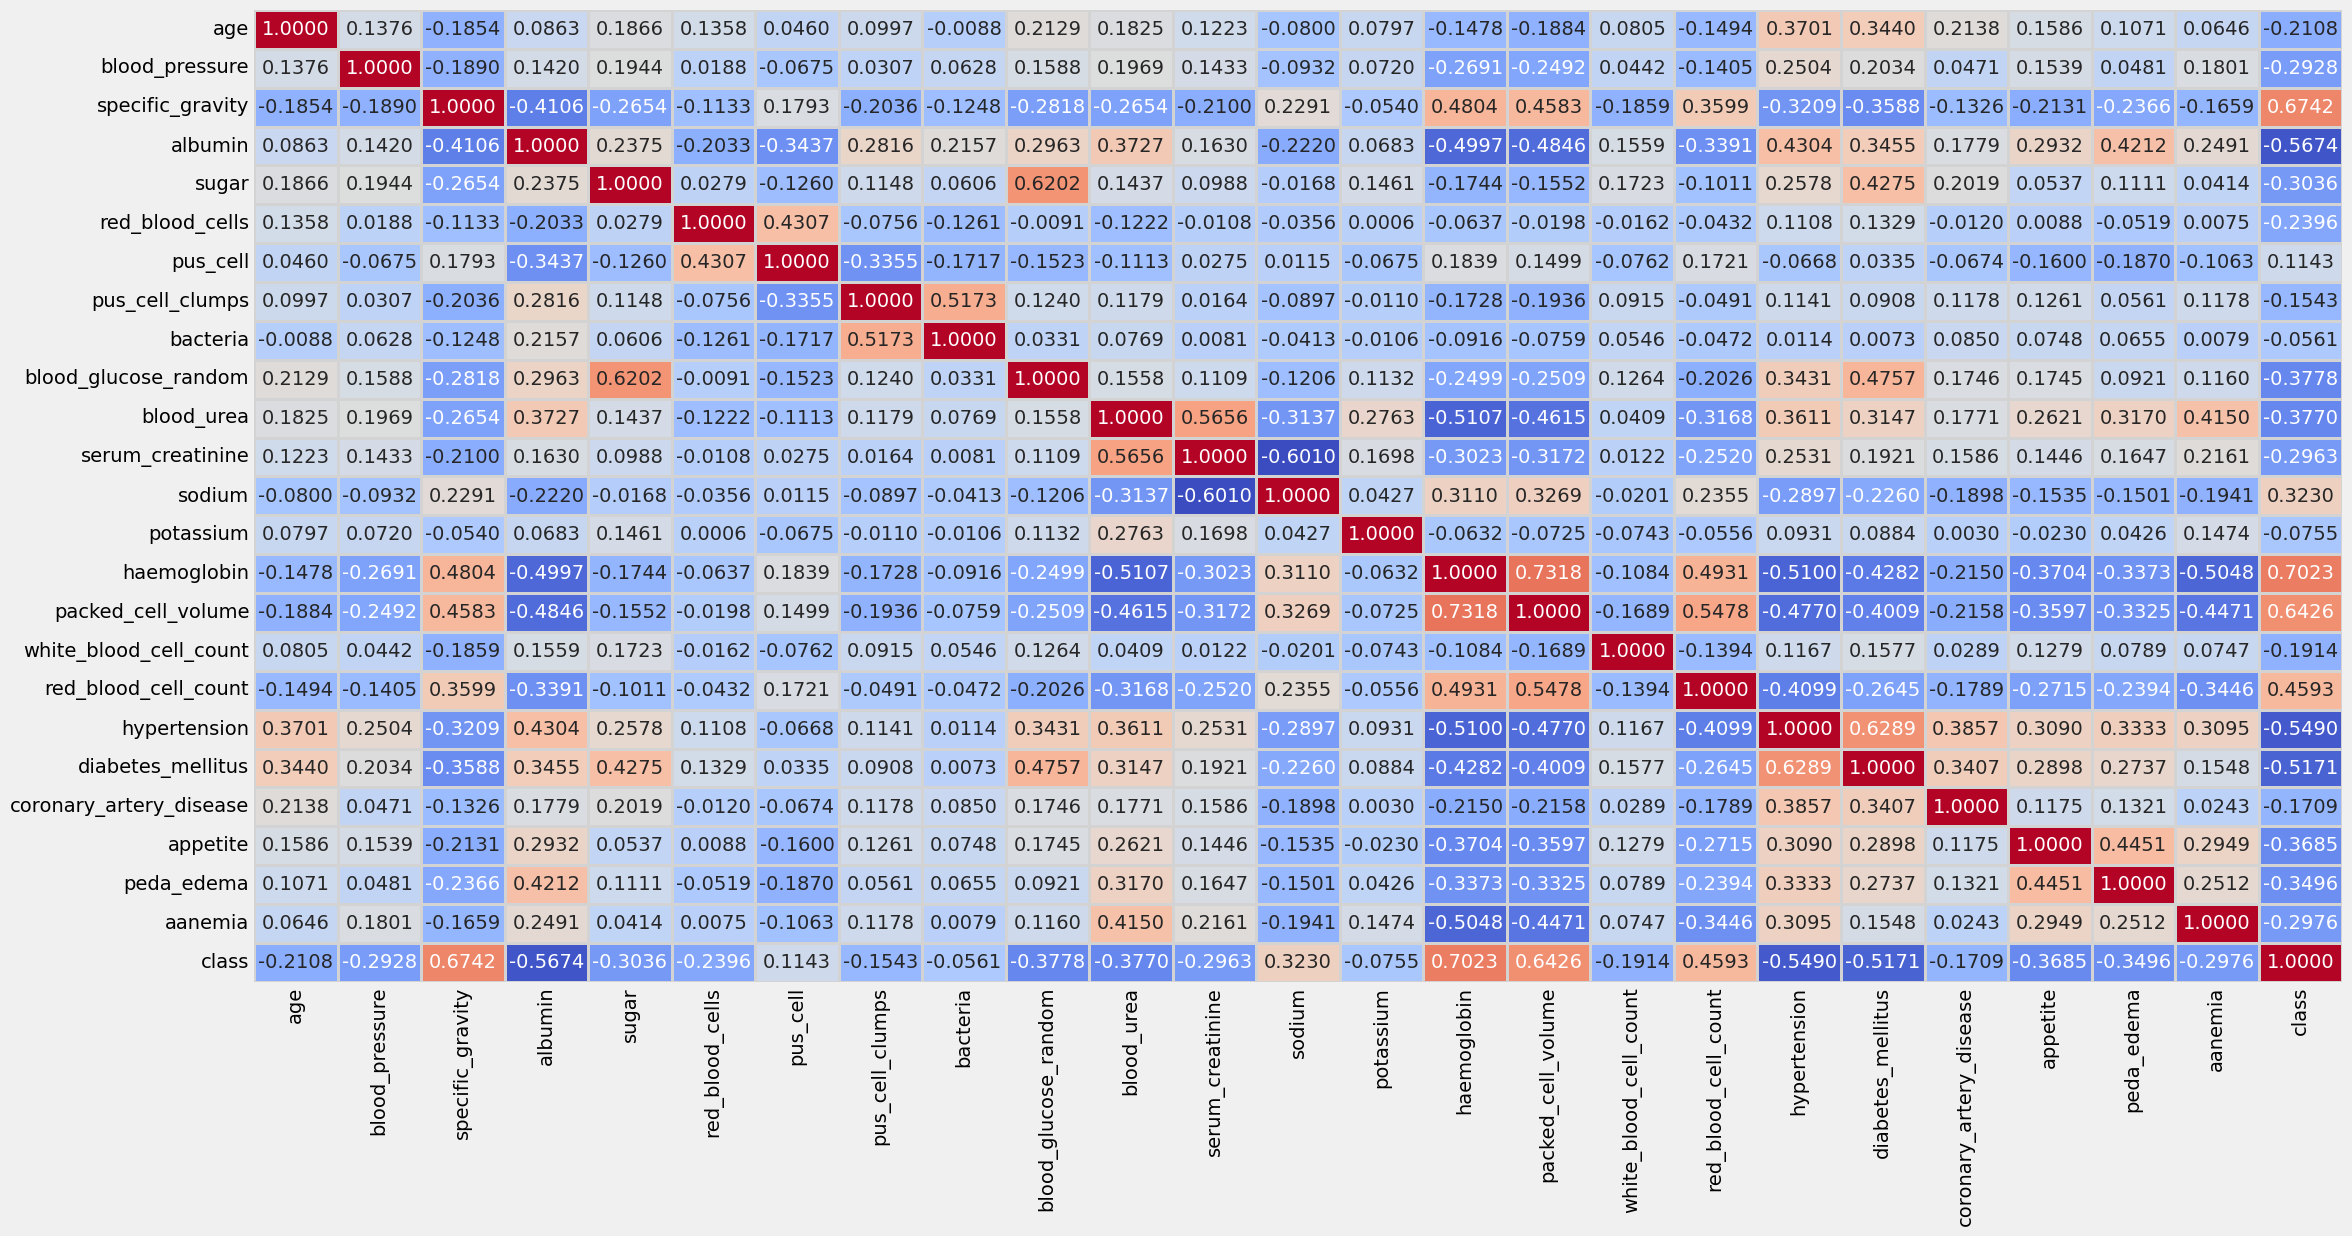

<Figure size 640x480 with 0 Axes>

In [42]:
# heatmap of data
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Now, create the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='lightgrey', fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False)
plt.show()
plt.savefig('corr1.png', bbox_inches='tight', pad_inches=0.0)


In [43]:
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())
# Make a table

Most Positive Correlations:
 red_blood_cell_count    0.459260
packed_cell_volume      0.642558
specific_gravity        0.674183
haemoglobin             0.702299
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 albumin                -0.567391
hypertension           -0.549034
diabetes_mellitus      -0.517083
blood_glucose_random   -0.377805
blood_urea             -0.377038
Name: class, dtype: float64


In [44]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

### Data Preprocessing

In [45]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [24]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [46]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [47]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [48]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [49]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [50]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [51]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### Feature Encoding

In [52]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 3 categories

pus_cell has 3 categories

pus_cell_clumps has 3 categories

bacteria has 3 categories

hypertension has 3 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 3 categories

appetite has 3 categories

peda_edema has 3 categories

aanemia has 3 categories

class has 2 categories



In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [54]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,120.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,103.0,18.0,0.8,138.0,3.8,11.3,38.0,6000.0,2.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,3.5,9.6,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,2.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [55]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [56]:
X.shape

(400, 24)

In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

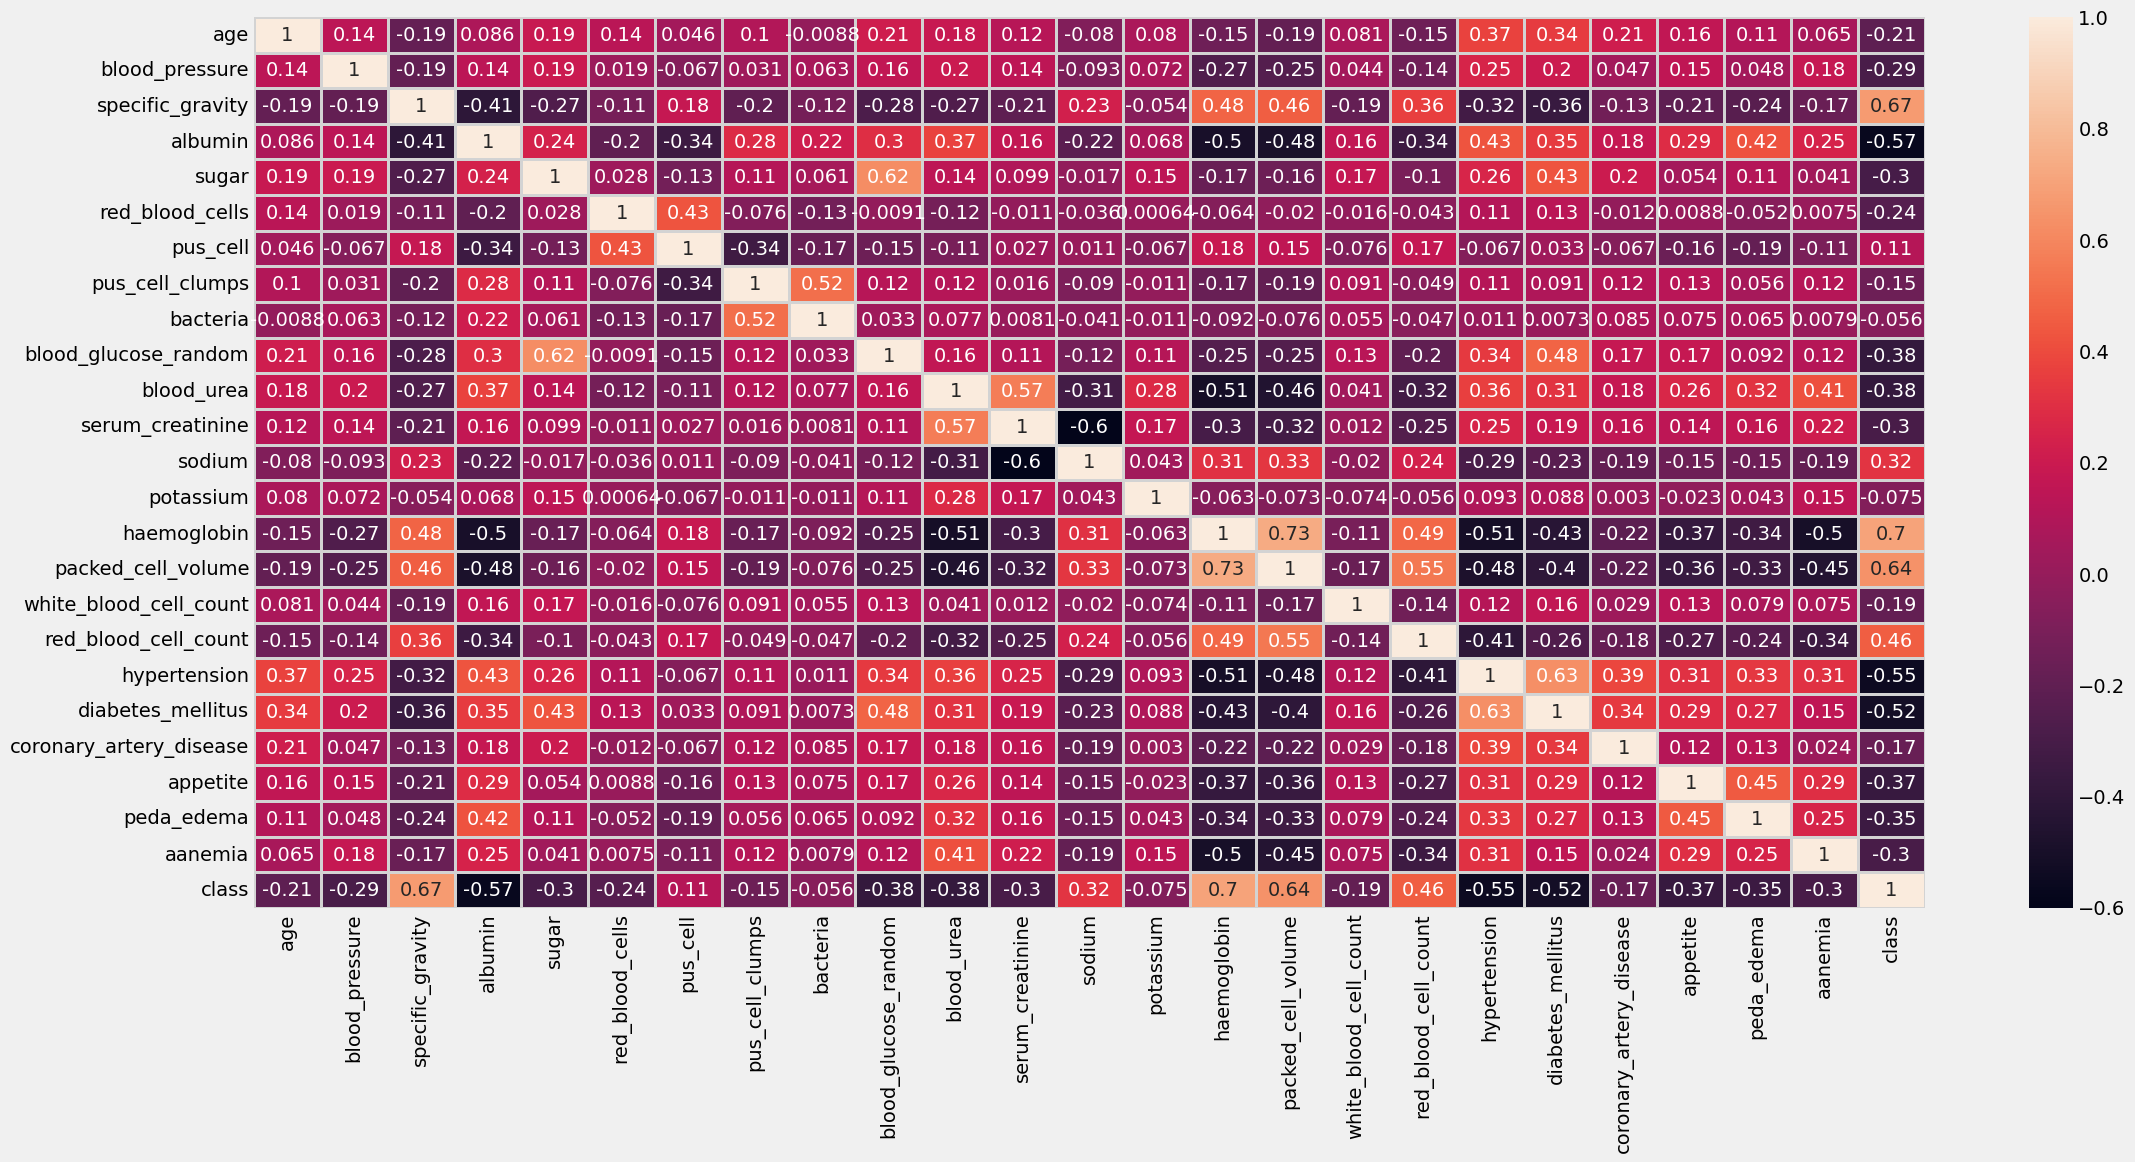

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize = (24, 11))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()
plt.savefig('correlation.png')

In [60]:
# Find correlations with the target and sort
correlations = df.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

# MENTION IN PAPER

Most Positive Correlations:
 red_blood_cell_count    0.459260
packed_cell_volume      0.642558
specific_gravity        0.674183
haemoglobin             0.702299
class                   1.000000
Name: class, dtype: float64

Most Negative Correlations:
 albumin                -0.567391
hypertension           -0.549034
diabetes_mellitus      -0.517083
blood_glucose_random   -0.377805
blood_urea             -0.377038
Name: class, dtype: float64


In [61]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
# scaler1 = StandardScaler()
# scaler1.fit(X)

MinMaxScaler()

In [62]:
new_features = scaler.transform(X)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 0.5        0.         0.5       ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [63]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,120.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,103.0,18.0,0.8,138.0,3.8,11.3,38.0,6000.0,2.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,3.5,9.6,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,2.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [64]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,120.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,103.0,18.0,0.8,138.0,3.8,11.3,38.0,6000.0,2.5,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,3.5,9.6,31.0,7500.0,4.5,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,2.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [65]:
 # splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.25, random_state=67)

In [67]:
from mlxtend.plotting import plot_confusion_matrix

# KNN classifier

Training Accuracy of KNN is 0.9766666666666667
Test Accuracy of KNN is 0.94 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.91      0.95      0.93        43

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



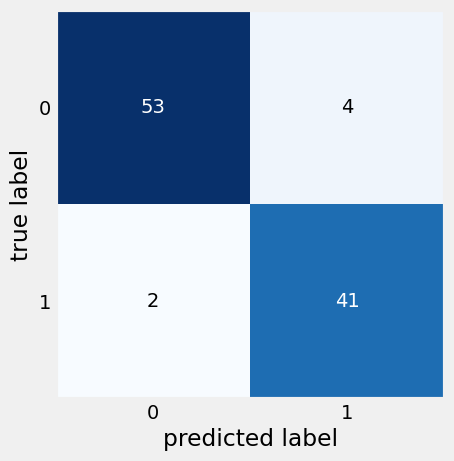

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)))
plt.show()

In [69]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [70]:
f1_score(y_test, knn.predict(X_test))

0.9318181818181819

# Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=67)
dtc.fit(X_train,y_train)
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of DTC is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

NameError: name 'X_train' is not defined

# Random Forest Classifier

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.93      0.96        43

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



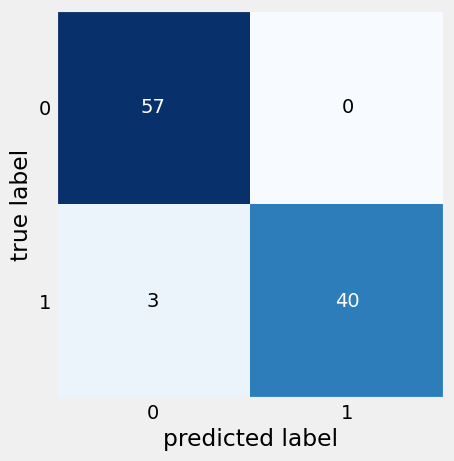

In [75]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(random_state=67)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rd_clf.predict(X_test)))
plt.show()

In [80]:
precision_score(y_test, rd_clf.predict(X_test))

1.0

# Gradient Boost Classifier

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.93      0.96        43

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



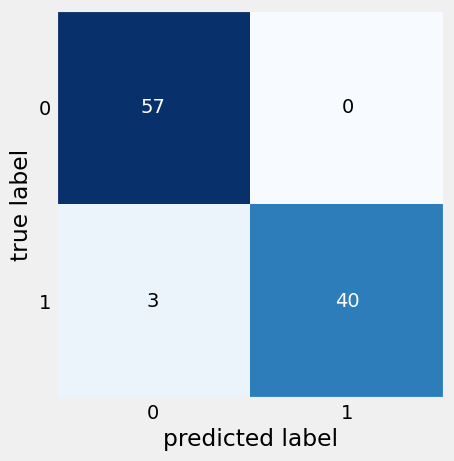

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=67)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gb.predict(X_test)))
plt.show()




# XGBoost

Training Accuracy of XGBoost Classifier: 1.0
Test Accuracy of XGBoost Classifier: 0.95 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.95      0.93      0.94        43

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



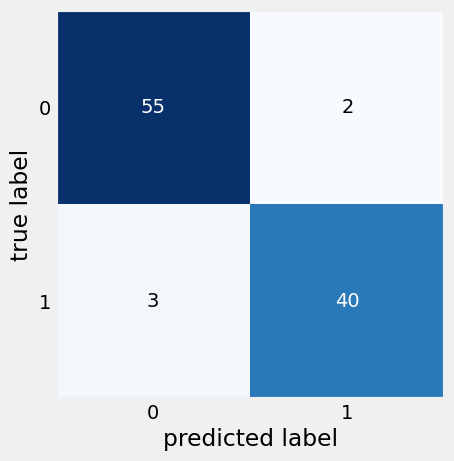

In [82]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=67)
xgb_clf.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_clf.predict(X_test)
# Calculate accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"Training Accuracy of XGBoost Classifier: {accuracy_score(y_train, xgb_clf.predict(X_train))}")
print(f"Test Accuracy of XGBoost Classifier: {xgb_acc} \n")

# Print classification report
print("Classification Report:\n", classification_report(y_test, xgb_pred))

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, xgb_pred))
plt.show()

In [83]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier','XGBoost'],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc,xgb_acc]
})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Test_Score
2,Random Forest Classifier,0.97
3,Gradient Boosting Classifier,0.97
4,XGBoost,0.95
0,KNN,0.94
1,Decision Tree Classifier,0.93


In [91]:
px.bar(data_frame = models, x = 'Test_Score', y = 'Model', color = 'Test_Score', template = 'plotly_dark', 
       title = 'Models Comparison')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Test_Score=%{marker.color}<br>Model=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.94, 0.93, 0.97, 0.97, 0.95]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0.94, 0.93, 0.97, 0.97, 0.95]),
              'xaxis': 'x',
              'y': array(['KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
                          'Gradient Boosting Classifier', 'XGBoost'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Test_Score'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Models Comparison'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Test_Score'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}}}
})

In [93]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier','XGBoost'],
    'Training_Score' : [accuracy_score(y_train, knn.predict(X_train)),accuracy_score(y_train, dtc.predict(X_train)),accuracy_score(y_train, rd_clf.predict(X_train)),
                        accuracy_score(y_train, gb.predict(X_train)),accuracy_score(y_train, xgb_clf.predict(X_train))],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
    
})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Training_Score,Test_Score
2,Random Forest Classifier,1.000000,0.97
3,Gradient Boosting Classifier,1.000000,0.97
4,XGBoost,1.000000,0.95
0,KNN,0.976667,0.94
1,Decision Tree Classifier,0.976667,0.93


In [97]:
pip install matplotlib --upgrade


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\dassa\appdata\local\programs\python\python310\lib\site-packages (3.8.0)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 991.0 kB/s eta 0:00:08
    --------------------------------------- 0.1/7.6 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.6 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/7.6 MB 4.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.6 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.6 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\dassa\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
Model = ( 'KNN', 'DTC', 'RFC',
             'GBC', 'XGB')

In [108]:
precision1 = [96
,93
,95
,95
,95
]

recall1 = [93
,98
,100
,100
,96
]

f1_score1 =[95
,96
,97
,97
,96
]

In [109]:
x = np.arange(len(Model))
width = 0.3

In [110]:
x

array([0, 1, 2, 3, 4])

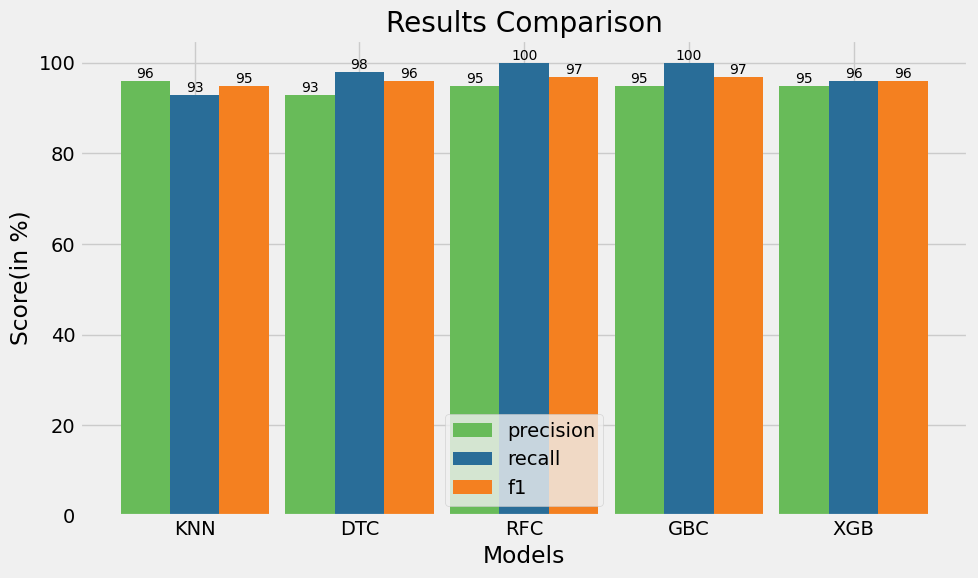

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

bar1 = ax.bar(x, precision1, width, label='precision',color = '#68bb59')
bar2 = ax.bar(x + width, recall1, width, label='recall',color = '#296d98')
bar3 = ax.bar(x + width*2, f1_score1, width, label='f1',color="#f48020")

ax.set_ylabel('Score(in %)')
ax.set_xlabel('Models')
ax.set_title('Results Comparison')
ax.set_xticks(x+width,Model)
ax.legend(loc="lower center")
 
#setting bar labels
ax.bar_label(bar1,fontsize=10)
ax.bar_label(bar2,fontsize=10)
ax.bar_label(bar3,fontsize=10)
 
fig.tight_layout()
plt.savefig("result.jpeg")
plt.show()